In [ ]:
import pandas as pd

fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')


In [ ]:

fake_df['label'] = 'fake'
true_df['label'] = 'true'


In [ ]:

combined_df = pd.concat([fake_df, true_df], ignore_index=True)


In [ ]:

combined_df = pd.concat([fake_df, true_df], ignore_index=True)


Shape of combined dataset: (44898, 5)
First few rows of combined dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017  fake  
1  December 31, 2017  fake  
2  December 30, 2017  fake  
3  December 29, 2017  fake  
4  December 25, 2017  fake  
Last few rows of combined data

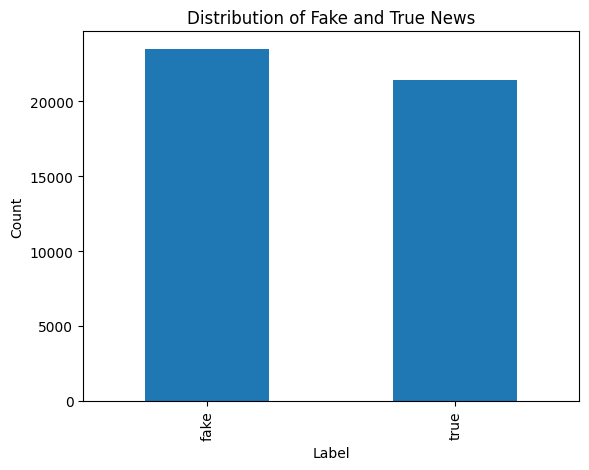

In [ ]:

import matplotlib.pyplot as plt
combined_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Fake and True News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [stemmer.stem(t) for t in tokens]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

combined_df['title'] = combined_df['title'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(combined_df['title'])
print("Shape of TF-IDF matrix:", X.shape)


Shape of TF-IDF matrix: (44898, 12826)


In [ ]:
combined_df.head()

,title,text,subject,date,label
0,donald trump send embarrass new year eve messa...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,drunk brag trump staffer start russian collus ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,sheriff david clark becom internet joke threat...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,trump ob even obama name code websit imag,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,pope franci call donald trump christma speech,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
